In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

In [2]:
#importing csv fiC:\Users\satvi\OneDrive\Desktop\baseballle
data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Customer churn is the ratio of the number of customers lost during a given period (in a month or a year) and the number of customers present at the beginning of that period.Here in our dataset there are many columns are features which includes customers personal data,their contract details,services they are using,payment details and churn is the label which we need to predict.

In [3]:
#checking for the shape of the data
data.shape

(7043, 21)

There are 7043 rows which includes the no of customers and 21 columns which includes the customer details.

In [4]:
#checking for the null method
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the dataset

In [5]:
#checking for the info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are different type of columns which are of object type,float type and integer type.But the Total charges need to be of float type but object type given there is some issue with that column lets check and then convert the column.

### Data Preprocessing

In [6]:
#The Totalcharges cannot be object type that need to be converted as float type
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
data.loc[data['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There is a empty space which our system treat that as a object so when we checked info method that given as object type.Those need to be filled,lets replace them with NAN values.

In [8]:
data['TotalCharges']=data['TotalCharges'].replace(' ',np.nan)

In [9]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
data['TotalCharges']=data['TotalCharges'].astype(float)
data['SeniorCitizen']=data['SeniorCitizen'].astype(object)

Senior citizen which means the column is telling about a person which cannot be a integer type so converting the column into object type

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [13]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
#checking for the stats
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


The stats gives the information only about numerical columns but not about the categorical columns.The tenure tells about how long the customers using the services in the company.In average the customers using the services is 32 days and maximum of 72 days.The average monthly charges are 64 and maximum of 118 dollars.Total charges they are making on average of 2283 and maximum total charges are 8684 dollars.

In [15]:
#seperating the categorical columns from the dataset
cat_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]==object:
        cat_col.append(i)
print(cat_col)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [16]:
##checking for the numerical columns
num_col=[]
for x in data.dtypes.index:
    if data.dtypes[x]!='object':
        num_col.append(x)
print(num_col)

['tenure', 'MonthlyCharges', 'TotalCharges']


Now lets fill those NAN values with mean

In [17]:
#checking for uniqueness in the data
#checking for unique values in dataset
data.apply(lambda x: len(x.unique()))

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [18]:
#Lets check for value counts
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

No and no phone service comes under same class so am replacing the no phone service with No

In [19]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [20]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [21]:
data['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [22]:
data['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [23]:
data['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [24]:
data['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [25]:
data['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [26]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [27]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

### Feature Engineering

In [28]:
#Converting the classes of No internet Sevices to No
data['MultipleLines']=data['MultipleLines'].replace('No phone service','No')
data[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]=data[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')

### EDA

### Visualisation

In [29]:
#Lets plot and visualise the categorical columns using count plot

<AxesSubplot:xlabel='gender', ylabel='count'>

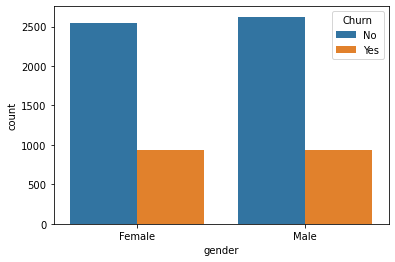

In [30]:
sns.countplot(data['gender'],hue='Churn',data=data)

Both Males and females are still existing in the company almost both are using the services equally and fvery few of them are churned from the company means they are not happy with services or might they have got better benefits from the other companies.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

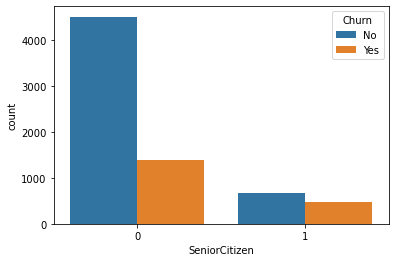

In [31]:
sns.countplot(data['SeniorCitizen'],hue='Churn',data=data)

Many of the senior citizens still continuing the services in the company.

<AxesSubplot:xlabel='Partner', ylabel='count'>

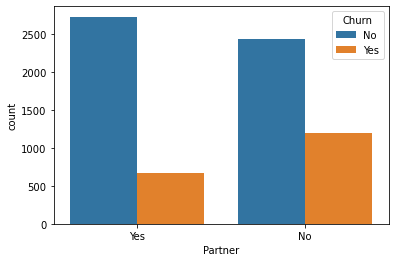

In [32]:
sns.countplot(data['Partner'],hue='Churn',data=data)

This columns tells weather the customers are having partners are not.Which means there martial status.The customers who are having partners they are using services either the person or his partner might have using the services.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

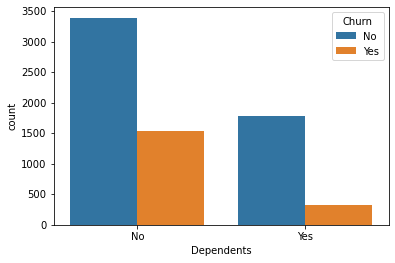

In [33]:
sns.countplot(data['Dependents'],hue='Churn',data=data)

It tells weather the customers having dependents are not which means either their parents ,children or wife any of them.Many of The customers who dont have dependents are using the services.

<AxesSubplot:xlabel='tenure', ylabel='Density'>

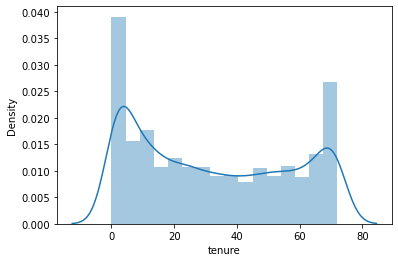

In [34]:
sns.distplot(data['tenure'])

Customer tenure is the length of time since the beginning of the customer relationship.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

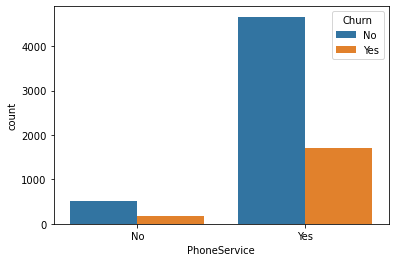

In [35]:
sns.countplot(data['PhoneService'],hue='Churn',data=data)

The customers who are using phone services are still existing in the company.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

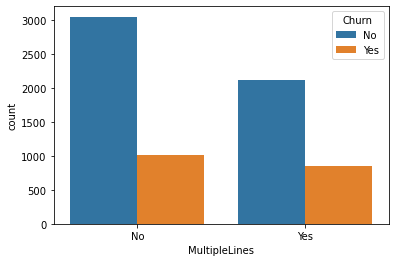

In [36]:
sns.countplot(data['MultipleLines'],hue='Churn',data=data)

The customers who are not using lines are using the services.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

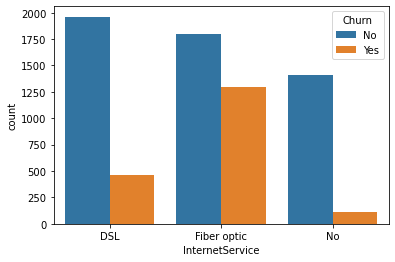

In [37]:
sns.countplot(data['InternetService'],hue='Churn',data=data)

The customers who are using DSl as internet services are existing the company.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

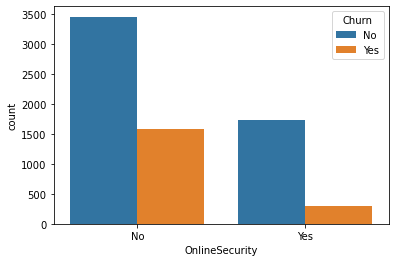

In [38]:
sns.countplot(data['OnlineSecurity'],hue='Churn',data=data)

The people who are using online security are existing in the company.

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

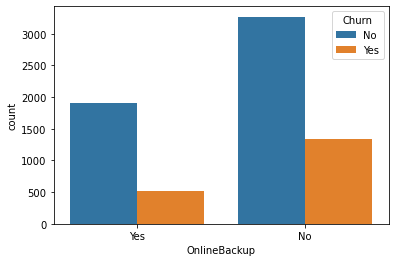

In [39]:
sns.countplot(data['OnlineBackup'],hue='Churn',data=data)

The customers who are not using online Backup they are continuing with the services.

In [40]:
cat_col

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

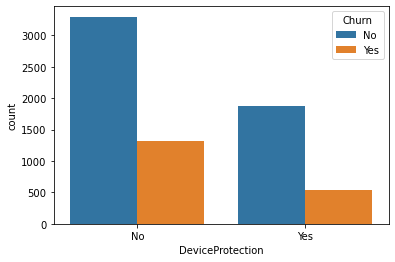

In [41]:
sns.countplot(data['DeviceProtection'],hue='Churn',data=data)

The customers who are existing in the comapny are not protecting there devices which means using Anti virus protection in their devices.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

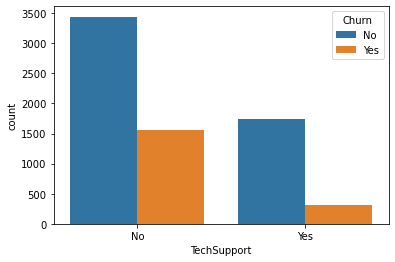

In [42]:
sns.countplot(data['TechSupport'],hue='Churn',data=data)

The customers who exist in the company are not taking the technical support from the company.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

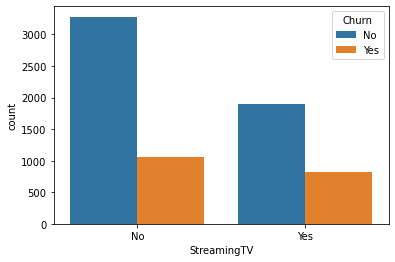

In [43]:
sns.countplot(data['StreamingTV'],hue='Churn',data=data)

The customers who don't access to tv from their devices are existing in the company

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

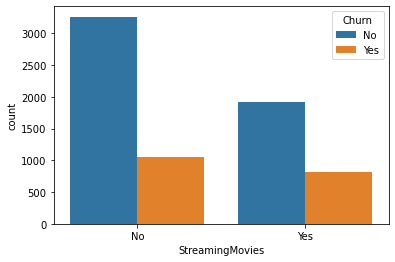

In [44]:
sns.countplot(data['StreamingMovies'],hue='Churn',data=data)

The customer who are existing dont stream movies in their devices.

<AxesSubplot:xlabel='Contract', ylabel='count'>

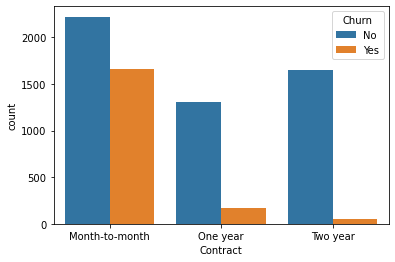

In [45]:
sns.countplot(data['Contract'],hue='Churn',data=data)

The customers who take month to month contracts they are existing in the company

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

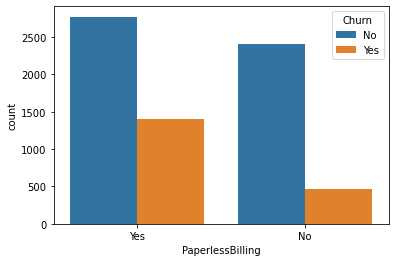

In [46]:
sns.countplot(data['PaperlessBilling'],hue='Churn',data=data)

The customers who makes paperless billing are existing in the company

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

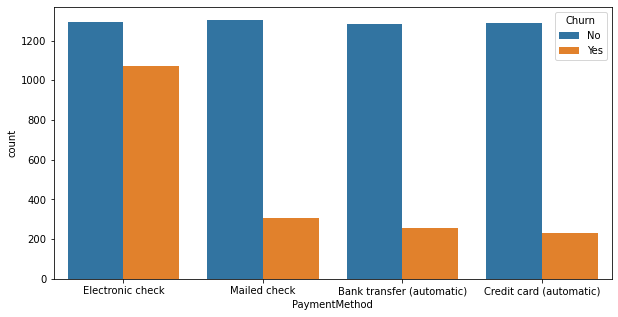

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod',hue='Churn',data=data)

All customers who are existing in the company uses all modes of payment

<AxesSubplot:xlabel='Churn', ylabel='count'>

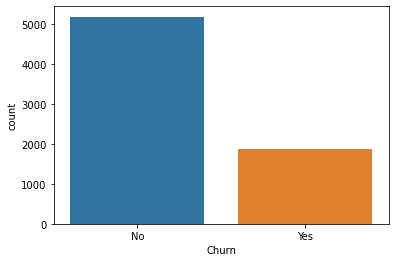

In [48]:
sns.countplot(data['Churn'],data=data)

As per my assumption 86% of the customers are still existing in the company but remaining 14% of the customers are churned.

In [49]:
num_col

['tenure', 'MonthlyCharges', 'TotalCharges']

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

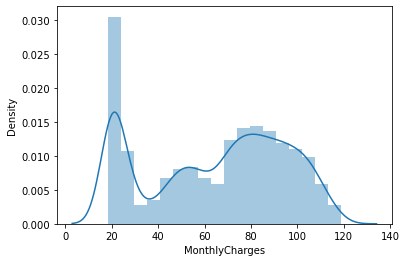

In [50]:
#plotting the distribution plots for numerical columns and check how the data is distributed
sns.distplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

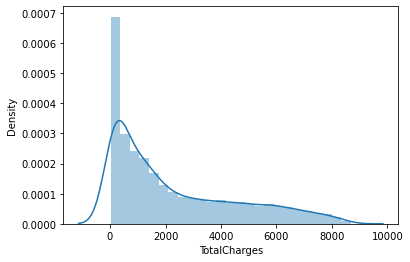

In [51]:
sns.distplot(data['TotalCharges'])

In [52]:
#checking for skewness
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

since the senior citizen to be a categorical column that showing lot of skewness because the skewness should be in the range of -0.5 to 0.5.But in this case Total charges is having lots of skewness lets use log transformation for that column and remove skewness

In [53]:
data['TotalCharges']=np.log(1+data['TotalCharges'])

In [54]:
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.745402
dtype: float64

<AxesSubplot:xlabel='tenure'>

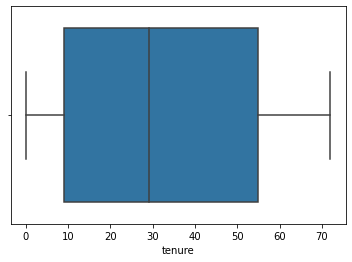

In [55]:
# Now lets plot box plot and check for the outliers
sns.boxplot(data['tenure'])

<AxesSubplot:xlabel='MonthlyCharges'>

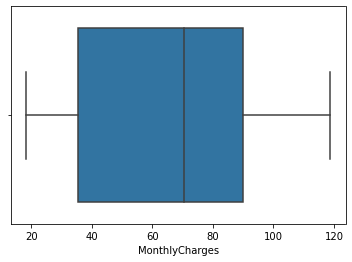

In [56]:
sns.boxplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

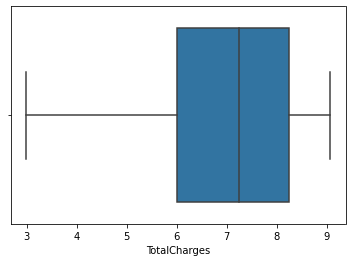

In [57]:
sns.boxplot(data['TotalCharges'])

There are no outliers present in our data

In [58]:
#Lets Encode our categorical columns
#Importing Label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
cat_col=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in cat_col:
    data[col]=lab_enc.fit_transform(data[col])

In [59]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,3.429137,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,7.544597,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,4.692723,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,7.518471,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.028148,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,7.596643,0
7039,2234-XADUH,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,8.904345,0
7040,4801-JZAZL,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,5.850621,0
7041,8361-LTMKD,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,5.728800,1


In [60]:
#I feel customer ID is not required to predict the churn of a customer
data.drop(columns=['customerID'],axis=1,inplace=True)

In [61]:
#Lets check the correlation values
data_corr=data.corr().abs()
data_corr

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001808,0.010517,0.005106,0.006488,0.008414,0.000863,0.017021,0.013773,0.002105,0.009212,0.008393,0.010487,0.000126,0.011754,0.017352,0.014569,0.006096,0.008612
Partner,0.001808,1.000000,0.452676,0.379697,0.017706,0.142057,0.000891,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,0.014877,0.154798,0.096848,0.339167,0.150448
Dependents,0.010517,0.452676,1.000000,0.159712,0.001762,0.024526,0.044590,0.080972,0.023671,0.013963,0.063268,0.016558,0.039741,0.243187,0.111377,0.040292,0.113890,0.095558,0.164221
tenure,0.005106,0.379697,0.159712,1.000000,0.008448,0.331941,0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.370436,0.247900,0.831575,0.352229
PhoneService,0.006488,0.017706,0.001762,0.008448,1.000000,0.279690,0.387436,0.092893,0.052312,0.071227,0.096340,0.022574,0.032959,0.002247,0.016505,0.004184,0.247398,0.072660,0.011942
MultipleLines,0.008414,0.142057,0.024526,0.331941,0.279690,1.000000,0.011124,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,0.171026,0.490434,0.441169,0.040102
InternetService,0.000863,0.000891,0.044590,0.030359,0.387436,0.011124,1.000000,0.393013,0.314737,0.306805,0.389382,0.242532,0.250343,0.099721,0.138625,0.086140,0.323260,0.204113,0.047291
OnlineSecurity,0.017021,0.143106,0.080972,0.327203,0.092893,0.098108,0.393013,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,0.003636,0.150100,0.296594,0.376267,0.171226
OnlineBackup,0.013773,0.141498,0.023671,0.360277,0.052312,0.202237,0.314737,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.170898,0.441780,0.444439,0.082255
DeviceProtection,0.002105,0.153786,0.013963,0.360653,0.071227,0.201137,0.306805,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.219310,0.103797,0.181085,0.482692,0.463738,0.066160


There is no much correlation exists with features and labels.There only two columns which are correlated to each other they are totalcharges and tenure there 83% correlated to each other.

<AxesSubplot:>

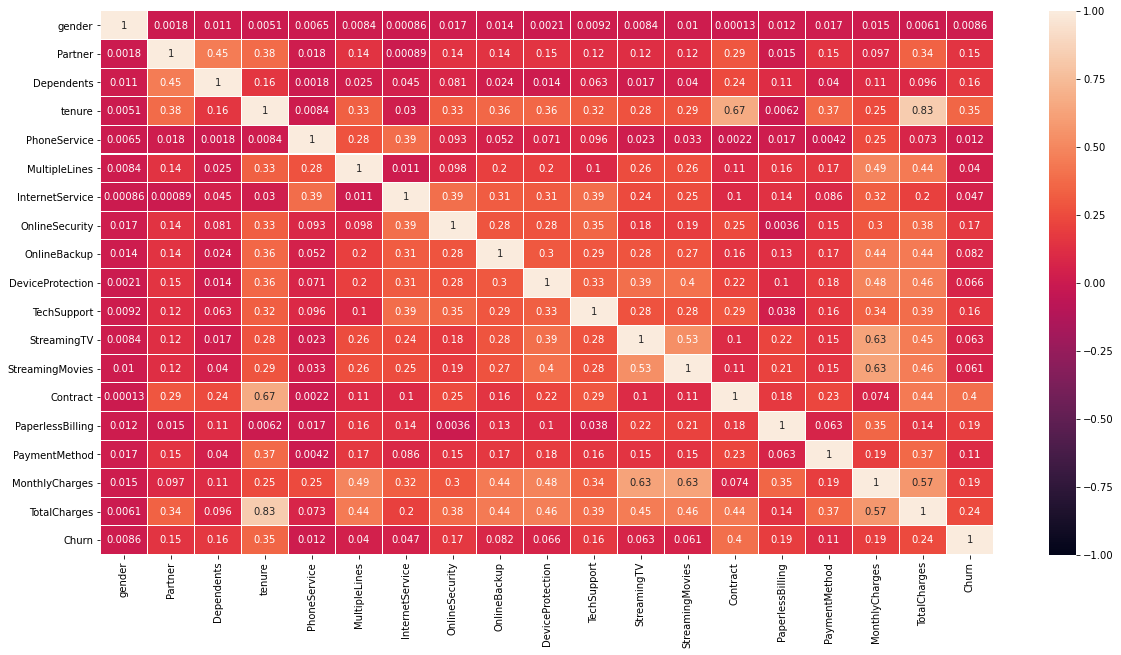

In [62]:
#Lets plot heat map and check
plt.figure(figsize=(20,10))
sns.heatmap(data_corr,vmin=-1,vmax=+1,annot=True,linewidths=0.1,fmt='.2g')

1.It indicates that the lightly coloured are having high correlation and dark coloured having less correlation.

2.Our label is correlated with tenure and very less correlated with gender.There is multicollinearity exists with toatal charges and tenure.Contract is 60% correlated with tenure.Steaming Tv and streaming Movies are both correlated with monthly charges.


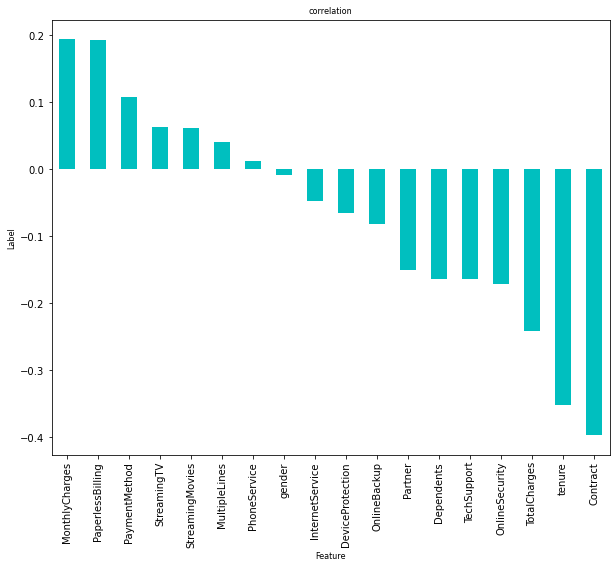

In [131]:
#Plotting the type of correlation with label and features
plt.figure(figsize=(10,8))
data.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=8)
plt.ylabel('Label',fontsize=8)
plt.title('correlation',fontsize=8)
plt.show()

Many of the features are Negitively correlated and only some features are positively correlated as shown in the figure.

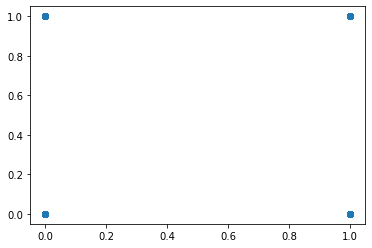

In [84]:
#Scatter plot to check the relation
var=['gender']
plt.scatter(data[var],data['Churn'])


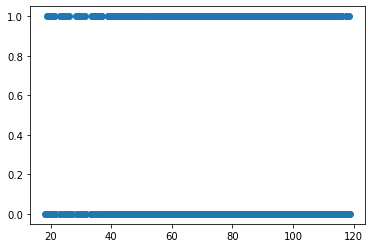

In [85]:
var=['MonthlyCharges']
plt.scatter(data[var],data['Churn'])


monthly charges are correlated with the label.

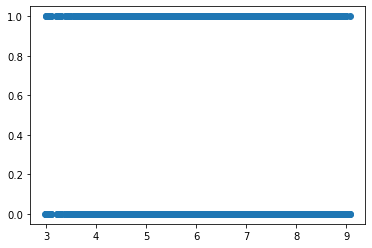

In [86]:
var=['TotalCharges']
plt.scatter(data[var],data['Churn'])

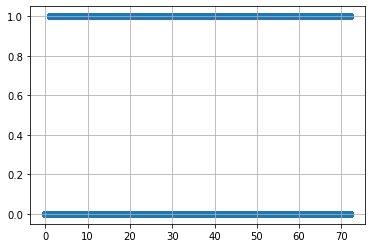

In [88]:
var='tenure'
plt.scatter(x=data[var], y=data['Churn'])
plt.grid(True)

In [63]:
#seperating features and Label columns 
x=data.drop(columns=['Churn'],axis=1)
y=data['Churn']

In [64]:
num_col

['tenure', 'MonthlyCharges', 'TotalCharges']

In [65]:
#Scailing the data using Standard scaler
#importing Standard scaler
from sklearn.preprocessing import StandardScaler
cols=['tenure', 'MonthlyCharges', 'TotalCharges']
for col in cols:     
    scaler = StandardScaler()     
    x[col] = scaler.fit_transform(x[col].values.reshape(-1, 1))
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277445,0,0,0,0,1,0,0,0,0,0,1,2,-1.160323,-2.274753
1,1,0,0,0,0.066327,1,0,0,1,0,1,0,0,0,1,0,3,-0.259629,0.388224
2,1,0,0,0,-1.236724,1,0,0,1,1,0,0,0,0,0,1,3,-0.362660,-1.457129
3,1,0,0,0,0.514251,0,0,0,1,0,1,1,0,0,1,0,0,-0.746535,0.371319
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-1.240087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,1,0,1,0,1,1,1,1,1,1,3,0.665992,0.421902
7039,0,0,1,1,1.613701,1,1,1,0,1,1,0,1,1,1,1,1,1.277533,1.268072
7040,0,0,1,1,-0.870241,0,0,0,1,0,0,0,0,0,0,1,2,-1.168632,-0.707892
7041,1,1,1,0,-1.155283,1,1,1,0,0,0,0,0,0,0,1,3,0.320338,-0.786718


In [132]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [133]:
#lets use oversampling technique on minority class using smote method
#import smote from imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
y_over.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

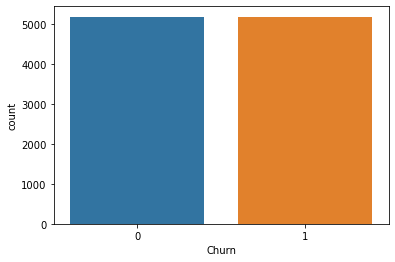

In [134]:
sns.countplot(y_over)

### classification Algorithms

In [135]:
#Importing some classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [136]:
#lets import some of the evaluation metrics for classification problem
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
#importing grid search cv for hyper parameter tuning and cross validation score for testing our model
from sklearn.model_selection import GridSearchCV,cross_val_score

### Logistic Regression

In [137]:
#Lets use Logistic regression algorithm to build our model
#instantiating
lr=LogisticRegression()
#fitting the model
lr.fit(x_train,y_train)

LogisticRegression()

In [138]:
#predicting
y_pred_lr=lr.predict(x_test)

In [139]:
lr.score(x_train,y_train)

0.807080651268459

In [140]:
#checking the score of our model
lr.score(x_test,y_test)

0.8097671777399205

In [141]:
#Finding the accuracy score
accuracy_score(y_test,y_pred_lr)


0.8097671777399205

In [142]:
#finding cross validation score
np.mean(cross_val_score(lr,x_over,y_over,cv=5))

0.7941668476217828

In [178]:
#Classification Report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1307
           1       0.66      0.55      0.60       454

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761



In [179]:
#Confusion matrix
confusion_matrix(y_test,y_pred_lr)

array([[1175,  132],
       [ 203,  251]], dtype=int64)

### KNeighbors classifier

In [143]:
#instansiating
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [144]:
y_pred_knn=knn.predict(x_test)

In [145]:
knn.score(x_train,y_train)

0.8385081408557364

In [146]:
accuracy_score(y_test,y_pred_knn)

0.7802385008517888

In [147]:
np.mean(cross_val_score(knn,x_over,y_over,cv=5))

0.8071148282794323

### Decision Tree classifier

In [148]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [149]:
y_pred_dt=dt.predict(x_test)

In [150]:
dt.score(x_train,y_train)

0.9979174555092768

In [151]:
dt.score(x_test,y_test)

0.7331061896649631

In [152]:
accuracy_score(y_test,y_pred_dt)

0.7331061896649631

In [153]:
#finding cross validation score
np.mean(cross_val_score(dt,x_over,y_over,cv=5))

0.7705889797166827

In [154]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1307
           1       0.48      0.53      0.51       454

    accuracy                           0.73      1761
   macro avg       0.66      0.67      0.66      1761
weighted avg       0.74      0.73      0.74      1761



In [155]:
confusion_matrix(y_test,y_pred_dt)

array([[1051,  256],
       [ 214,  240]], dtype=int64)

### Random Forest Classifier

In [156]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [157]:
y_pred_rf=rf.predict(x_test)

In [158]:
rf.score(x_train,y_train)

0.9977281332828474

In [159]:
rf.score(x_test,y_test)

0.7995457126632595

In [160]:
accuracy_score(y_test,y_pred_rf)

0.7995457126632595

In [164]:
np.mean(cross_val_score(rf,x_over,y_over,cv=5))

0.8436463740097085

In [165]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1307
           1       0.64      0.51      0.57       454

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



In [166]:
confusion_matrix(y_test,y_pred_rf)

array([[1178,  129],
       [ 224,  230]], dtype=int64)

### Support Vector Classifier

In [167]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [168]:
#Prediction
y_pred_svm=svm.predict(x_test)

In [169]:
#Training Score
svm.score(x_train,y_train)

0.8131389625141991

In [170]:
#Testing score
svm.score(x_test,y_test)

0.8109028960817717

In [171]:
#Accuracy_score
accuracy_score(y_test,y_pred_svm)

0.8109028960817717

In [172]:
#Cross validation score
np.mean(cross_val_score(svm,x_over,y_over,cv=5))

0.7996758685261848

In [173]:
#Classification Report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1307
           1       0.69      0.49      0.57       454

    accuracy                           0.81      1761
   macro avg       0.76      0.71      0.73      1761
weighted avg       0.80      0.81      0.80      1761



In [174]:
#Confusion Matrix
confusion_matrix(y_test,y_pred_svm)

array([[1204,  103],
       [ 230,  224]], dtype=int64)

### Navie Bayes Classifier

In [177]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
print("Navie Bayes Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy:{}%".format(round(nb.score(x_test,y_test)*100,2)))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred_nb))

Navie Bayes Classifier: 

               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1307
           1       0.52      0.77      0.62       454

    accuracy                           0.76      1761
   macro avg       0.71      0.76      0.72      1761
weighted avg       0.81      0.76      0.77      1761

Test Accuracy:75.87%
Confusion Matrix: [[986 321]
 [104 350]]


### Roc Auc Scores

In [217]:
#Logistic Regression
lr=roc_auc_score(y_test,y_pred_lr)

In [183]:
### KNN
roc_auc_score(y_test,y_pred_knn)

0.7074790437124396

In [184]:
roc_auc_score(y_test,y_pred_dt)

0.6663829801576736

In [185]:
roc_auc_score(y_test,y_pred_rf)

0.7039543090576329

In [218]:
svm=roc_auc_score(y_test,y_pred_svm)

Compared to all the models Logistic Regression performing well in terms of accuracy, cross validation score,roc auc score and also False positive cases are less compared to all the other models even SVM also has good performance but roc auc score is far better for logistic regression,so am considering Logistic regression as my final model for predicting customer churn in telecom industry.

### Hyper Parameter Tuning

### Logistic Regression

In [196]:
parameters={'max_iter':[20,30,40,50],'multi_class':['auto', 'ovr', 'multinomial'],'max_iter':[100,200,300],"class_weight":['dict','balanced'],'penalty':['l1','l2','elasticnet','none']}

In [199]:
grid_search = GridSearchCV(lr, param_grid=parameters, cv=10) 
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'class_weight': ['dict', 'balanced'],
                         'max_iter': [100, 200, 300],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [201]:
grid_search.best_params_

{'class_weight': 'dict',
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2'}

In [204]:
lr=LogisticRegression(class_weight='dict',max_iter=100,multi_class='auto',penalty='l2')
lr.fit(x_train,y_train)
y_pred_logr=lr.predict(x_test)
print("Logistic Regression: \n\n",classification_report(y_test,y_pred_logr))
print("Test Accuracy:{}%".format(round(lr.score(x_test,y_test)*100,2)))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred_logr))

Logistic Regression: 

               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1307
           1       0.66      0.55      0.60       454

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761

Test Accuracy:80.98%
Confusion Matrix: [[1175  132]
 [ 203  251]]


In [210]:
#Logistic Regression
auc=roc_auc_score(y_test,y_pred_logr)

In [211]:
#Ploting curve of ROC AUC 
fpr,tpr,thresholds=roc_curve(y_test,y_pred_logr)
fpr

array([0.        , 0.10099464, 1.        ])

In [212]:
tpr

array([0.        , 0.55286344, 1.        ])

In [213]:
thresholds

array([2, 1, 0])

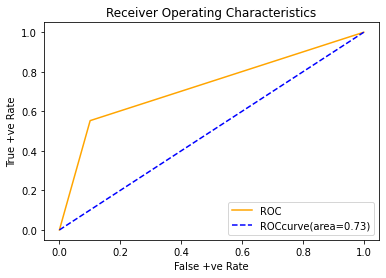

In [214]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--',label='ROCcurve(area=%0.2f)'%auc)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()


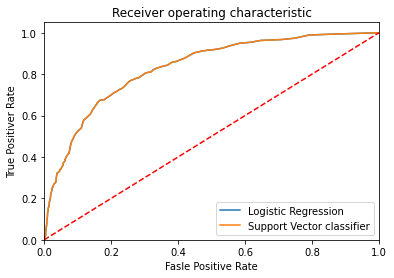

In [223]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
lr_roc_auc=roc_auc_score(y_test, lr.predict(x_test))
fpr,tpr,thersholds=roc_curve(y_test,lr.predict_proba(x_test)[:,1])
svm=SVC()
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)
lr_roc_auc=roc_auc_score(y_test,lr.predict(x_test))
svm_roc_auc=roc_auc_score(y_test,svm.predict(x_test))
fpr,tpr,thersholds=roc_curve(y_test,rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression' %lr_roc_auc)
plt.plot(fpr,tpr,label='Support Vector classifier' %svm_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positiver Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('ROC')
plt.show()

Here the false positive rate and true positive rate starts from zero and touches 1.

In [231]:
Final_mod_lr = LogisticRegression()
Final_mod_lr.fit(x_train,y_train)
pred_lr = Final_mod_lr.predict(x_test)
acc=accuracy_score(y_test,pred_lr)
print(acc*100)

80.97671777399205


In [232]:
Final_mod_svm = SVC()
Final_mod_svm.fit(x_train,y_train)
pred_svm= Final_mod_svm.predict(x_test)
acc=accuracy_score(y_test,pred_svm)
print(acc*100)

81.09028960817717


Both support vector classifier and Logistic regression giving almost the same accuracy but the roc auc scorfe is little less in SVM so am going and saving the model of logistic regression.

### saving the final model

In [233]:
import joblib
joblib.dump(Final_mod_lr,"Telecom Customer Churn.csv")

['Telecom Customer Churn.csv']

In [ ]:
#Comparing the values of actual and predicted

In [235]:
print(pred_lr[:20])
print(y_test[:20].values)

[0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0]
[0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0]


<AxesSubplot:xlabel='Churn', ylabel='count'>

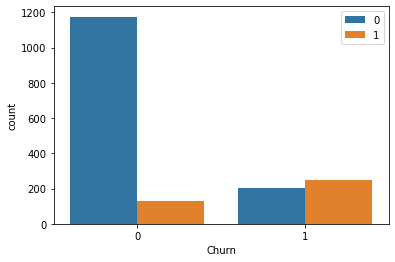

In [238]:
sns.countplot(x=y_test,hue=pred_lr)

We predicted as many of the customers of telecom industry are not churned they are still existing in the company and using the services.

The accuracy score of our model hits 81%.